### Task 1: Importing modules


In [1]:
from __future__ import print_function
%matplotlib inline

import os
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.image as image
import pandas as pd
import pandas_profiling

plt.style.use("ggplot")

import warnings
warnings.simplefilter("ignore")


plt.rcParams['figure.figsize'] = (12, 8)


Bad key "text.kerning_factor" on line 4 in
C:\Users\Janmejoy\Anaconda4\lib\site-packages\matplotlib\mpl-data\stylelib\_classic_test_patch.mplstyle.
You probably need to get an updated matplotlibrc file from
https://github.com/matplotlib/matplotlib/blob/v3.1.3/matplotlibrc.template
or from the matplotlib source distribution


### Task 2: Exploratory Data Analysis

In [2]:
hr = pd.read_csv('turnover.csv')
hr.head()

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years,sales,salary
0,0.38,0.53,2,157,3,0,1,0,sales,low
1,0.80,0.86,5,262,6,0,1,0,sales,medium
2,0.11,0.88,7,272,4,0,1,0,sales,medium
3,0.72,0.87,5,223,5,0,1,0,sales,low
4,0.37,0.52,2,159,3,0,1,0,sales,low


In [3]:
#pip install -U pandas-profiling

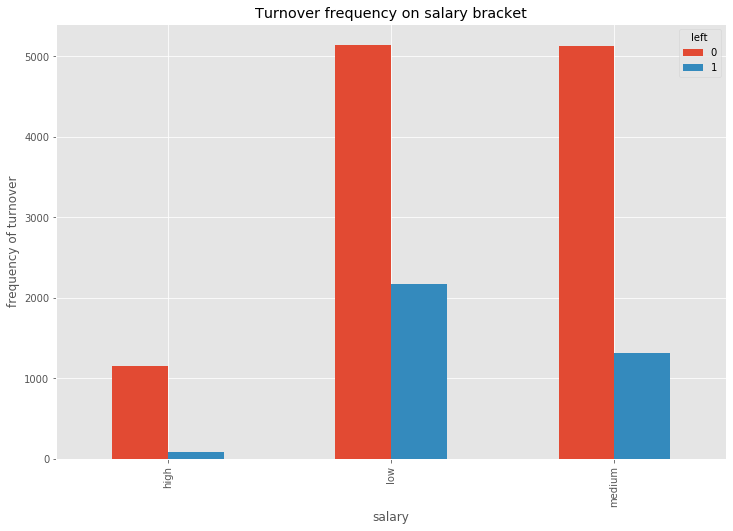

In [5]:
pd.crosstab(hr.salary, hr.left).plot(kind='bar')
plt.title("Turnover frequency on salary bracket")
plt.xlabel('salary')
plt.ylabel('frequency of turnover')
plt.show()

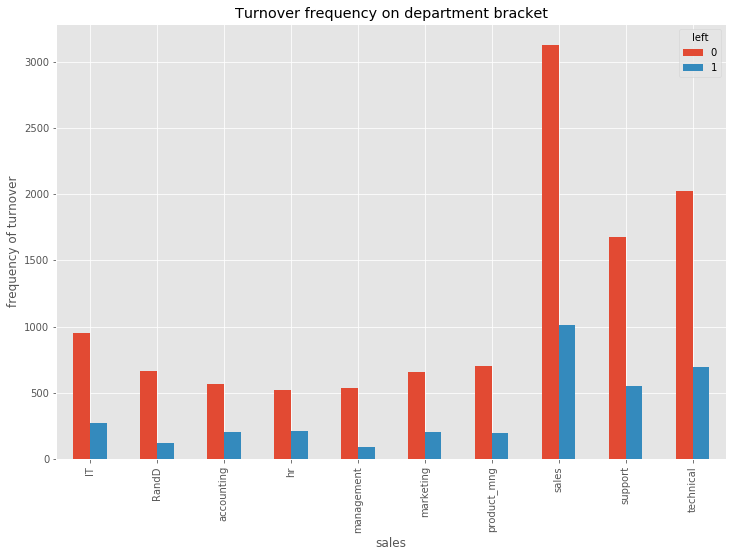

In [6]:
pd.crosstab(hr.sales, hr.left).plot(kind='bar')
plt.title("Turnover frequency on department bracket")
plt.xlabel('sales')
plt.ylabel('frequency of turnover')
plt.show()

### Task 3:Encode categorical features

In [7]:
cat_vars = ['sales', 'salary']
for var in cat_vars:
    cat_list = pd.get_dummies(hr[var], prefix=var)
    hr = hr.join(cat_list)

In [8]:
hr.head()

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years,sales,salary,...,sales_hr,sales_management,sales_marketing,sales_product_mng,sales_sales,sales_support,sales_technical,salary_high,salary_low,salary_medium
0,0.38,0.53,2,157,3,0,1,0,sales,low,...,0,0,0,0,1,0,0,0,1,0
1,0.80,0.86,5,262,6,0,1,0,sales,medium,...,0,0,0,0,1,0,0,0,0,1
2,0.11,0.88,7,272,4,0,1,0,sales,medium,...,0,0,0,0,1,0,0,0,0,1
3,0.72,0.87,5,223,5,0,1,0,sales,low,...,0,0,0,0,1,0,0,0,1,0
4,0.37,0.52,2,159,3,0,1,0,sales,low,...,0,0,0,0,1,0,0,0,1,0


In [9]:
hr.drop(columns = ['sales', 'salary'] , axis =1, inplace=True)

In [10]:
from yellowbrick.target import ClassBalance
plt.style.use("ggplot")
plt.rcParams['figure.figsize'] = [12,8]

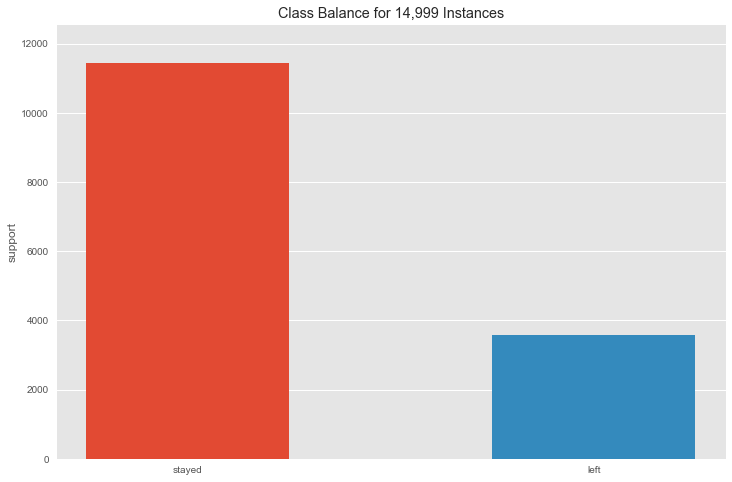

In [11]:
visualizer = ClassBalance(labels =[ 'stayed','left']).fit(hr.left)
visualizer.show()

In [12]:
x = hr.loc[:, hr.columns != 'left']
y = hr.left

In [13]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y, random_state=0,
                                                   test_size= 0.2, 
                                                   stratify=y)
                                

In [14]:
x_train.columns

Index(['satisfaction_level', 'last_evaluation', 'number_project',
       'average_montly_hours', 'time_spend_company', 'Work_accident',
       'promotion_last_5years', 'sales_IT', 'sales_RandD', 'sales_accounting',
       'sales_hr', 'sales_management', 'sales_marketing', 'sales_product_mng',
       'sales_sales', 'sales_support', 'sales_technical', 'salary_high',
       'salary_low', 'salary_medium'],
      dtype='object')

* decesion tree non parametric model, decesion tree have high variance promlem.. to reduce this we use random forest with ensambling technique

In [15]:
from sklearn import tree
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score

from sklearn.tree import export_graphviz
from IPython.display import SVG
from graphviz import Source
from IPython.display import display
from ipywidgets import interactive, IntSlider, FloatSlider, interact
import ipywidgets
from IPython.display import Image
from subprocess import call
import matplotlib.image as mpimg

In [16]:
@interact
def plot_tree(crit=['gini','entropy'],
              split=['best', 'random'],
              depth=IntSlider(min=1, max=30, value=2, continuous_update=False),
              min_split=IntSlider(min=2, max=5, value=1, continuous_update=False),
              min_leaf=IntSlider(min=1, max=5, value=2, continuous_update=False)):
    
    estimator =DecisionTreeClassifier(random_state=0,
                                     criterion=crit,
                                     splitter=split,
                                     max_depth=depth,
                                     min_samples_split=min_split,
                                     min_samples_leaf=min_leaf)
    estimator.fit(x_train, y_train)
    print("DTC accuracy on train : {:.3f}".format(accuracy_score(y_train,
                                                       estimator.predict(x_train))
                                          ))
    print("DTC accuracy on test : {:.3f}".format(accuracy_score(y_test,
                                                       estimator.predict(x_test))
                                        ))
    graph = Source(tree.export_graphviz(estimator, out_file=None,
                                       feature_names= x_train.columns,
                                       class_names=['stayed','quit'],
                                       filled=True))
    display(Image(data=graph.pipe(format='png')))
    
    return estimator

interactive(children=(Dropdown(description='crit', options=('gini', 'entropy'), value='gini'), Dropdown(descri…

In [17]:
@interact
def plot_tree(crit=['gini','entropy'],
              bootstrap=['True', 'False'],
              depth=IntSlider(min=1, max=30, value=2, continuous_update=False),
              forests= IntSlider(min=1, max=200, value=100, continuous_update=False),
              min_split=IntSlider(min=2, max=5, value=1, continuous_update=False),
              min_leaf=IntSlider(min=1, max=5, value=2, continuous_update=False)):
    
    estimator =RandomForestClassifier(random_state=1,
                                     criterion=crit,
                                     bootstrap=bootstrap,
                                     n_estimators =forests,
                                     max_depth=depth,
                                     min_samples_split=min_split,
                                     min_samples_leaf=min_leaf,
                                     n_jobs=-1,
                                     verbose=False)
    estimator.fit(x_train, y_train)
    print("rf accuracy on train : {:.3f}".format(accuracy_score(y_train,
                                                       estimator.predict(x_train))
                                          ))
    print("rf accuracy on test : {:.3f}".format(accuracy_score(y_test,
                                                       estimator.predict(x_test))
                                        ))
    num_tree = estimator.estimators_[0]
    print('\Visualizing Tree:', 0)
    
    
    graph = Source(tree.export_graphviz(num_tree, out_file=None,
                                       feature_names= x_train.columns,
                                       class_names=['stayed','quit'],
                                       filled=True))
    display(Image(data=graph.pipe(format='png')))
    
    return estimator

interactive(children=(Dropdown(description='crit', options=('gini', 'entropy'), value='gini'), Dropdown(descri…

In [18]:
from yellowbrick.model_selection import FeatureImportances
plt.rcParams['figure.figsize'] = (12,8)
plt.style.use('ggplot')

In [19]:
rf = RandomForestClassifier(bootstrap='True', class_weight=None, criterion='gini',
                       max_depth=2, max_features='auto', max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=2, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=-1, oob_score=False, random_state=1,
                       verbose=False, warm_start=False)

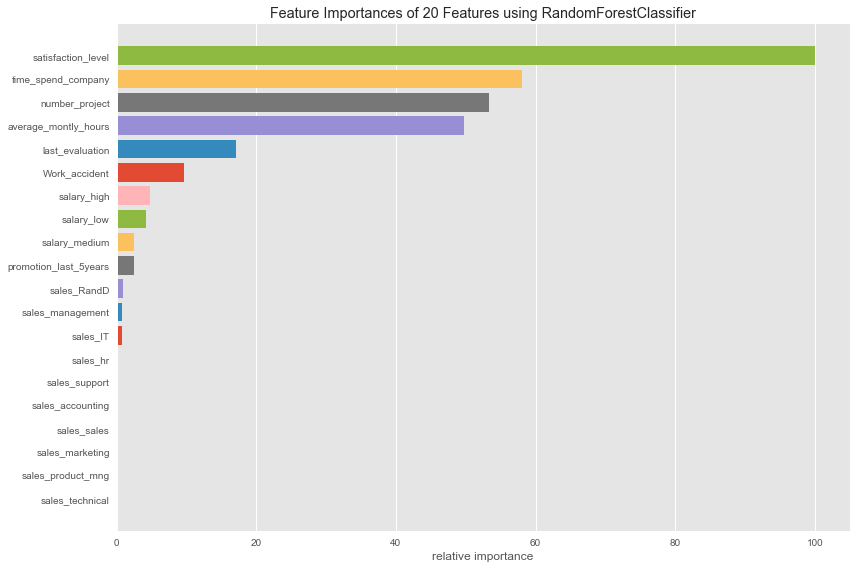

In [20]:
viz = FeatureImportances(rf)
viz.fit(x_train, y_train)
viz.show()

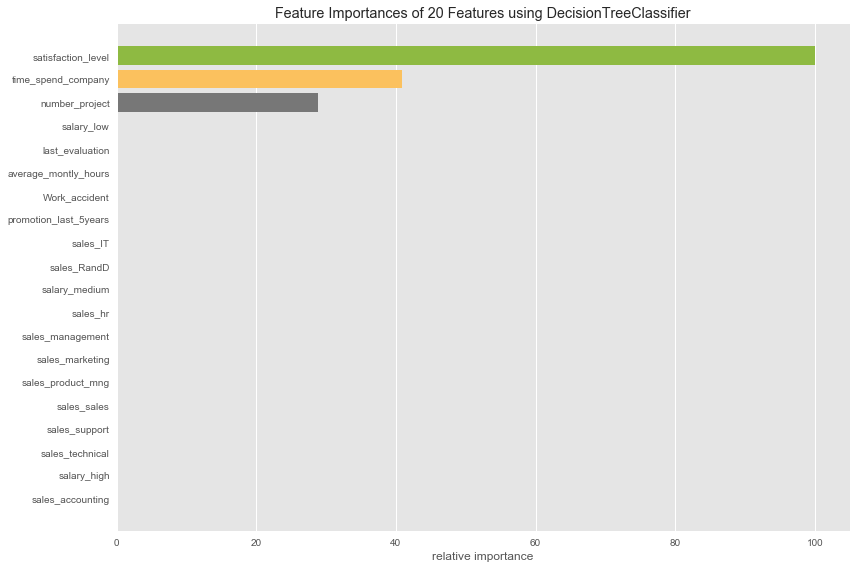

In [21]:
dt = DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=2,
                       max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=2, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort=False,
                       random_state=0, splitter='best')

viz = FeatureImportances(dt)
viz.fit(x_train, y_train)
viz.show()

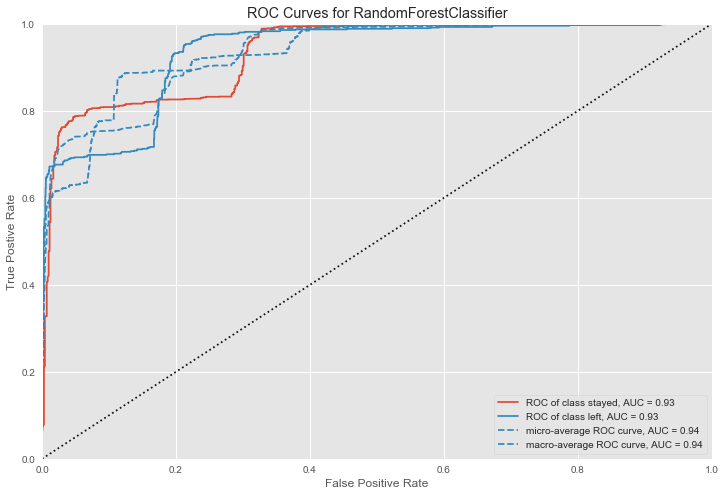

In [22]:
from yellowbrick.classifier import ROCAUC
vis = ROCAUC(rf, classes = ['stayed', 'left'])
vis.fit(x_train,y_train)
vis.score(x_test, y_test)
vis.poof();

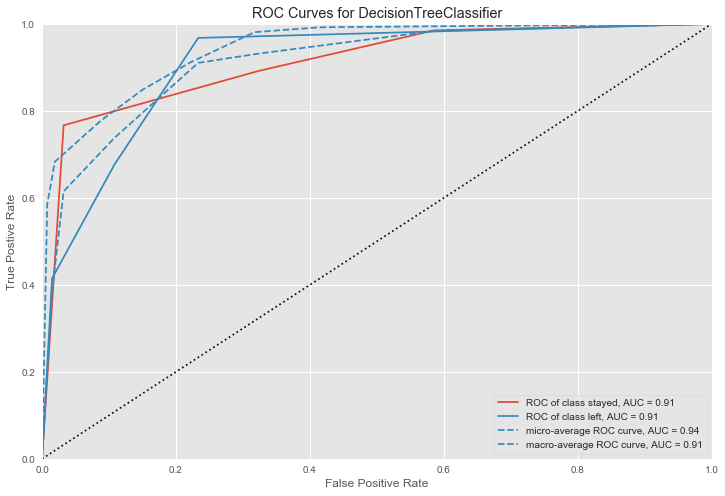

In [23]:
from yellowbrick.classifier import ROCAUC
vis = ROCAUC(dt, classes = ['stayed', 'left'])
vis.fit(x_train,y_train)
vis.score(x_test, y_test)
vis.poof();

In [24]:
@interact
def plot_tree(crit=['gini','entropy'],
              split=['best', 'random'],
              depth=IntSlider(min=1, max=30, value=2, continuous_update=False),
              min_split=IntSlider(min=2, max=5, value=1, continuous_update=False),
              min_leaf=IntSlider(min=1, max=5, value=2, continuous_update=False)):
    
    estimator =DecisionTreeClassifier(random_state=0,
                                     criterion=crit,
                                     splitter=split,
                                     max_depth=depth,
                                     min_samples_split=min_split,
                                     min_samples_leaf=min_leaf)
    estimator.fit(x_train, y_train)
    print("DTC accuracy on train : {:.3f}".format(accuracy_score(y_train,
                                                       estimator.predict(x_train))
                                          ))
    print("DTC accuracy on test : {:.3f}".format(accuracy_score(y_test,
                                                       estimator.predict(x_test))
                                        ))
    graph = Source(tree.export_graphviz(estimator, out_file=None,
                                       feature_names= x_train.columns,
                                       class_names=['stayed','quit'],
                                       filled=True))
    display(Image(data=graph.pipe(format='png')))
    
    return estimator

interactive(children=(Dropdown(description='crit', options=('gini', 'entropy'), value='gini'), Dropdown(descri…